In [5]:
from datetime import datetime, timedelta
import numpy as np
import random
from infrastructure import *
from signaling import *
from system import *
from train import *
from dispatch import *
import networkx as nx
from sim import *
from rail_networkx import *
from itertools import combinations, permutations

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from rail_networkx import all_simple_paths, shortest_path

In [12]:
sim_init_time = datetime.strptime('2018-01-10 10:00:00', "%Y-%m-%d %H:%M:%S")
sim_term_time = datetime.strptime('2018-01-10 15:30:00', "%Y-%m-%d %H:%M:%S")
spd_container = [random.uniform(0.01, 0.02) for i in range(20)]
acc_container = [0.5*random.uniform(2.78e-05*0.85, 2.78e-05*1.15) for i in range(20)]
dcc_container = [0.2*random.uniform(2.78e-05*0.85, 2.78e-05*1.15) for i in range(20)]
headway = 300 + random.random() * 400
sys = System(sim_init_time, spd_container, acc_container, dcc_container,
             term_time=sim_term_time,
             dos_period=['2018-01-10 11:30:00', '2018-01-10 12:30:00'],  
             dos_pos=(15,20),
             headway=headway, 
             refresh_time=50)
dp = Dispatcher(sys)
K165 = Train(sys, 
             ((sys.signal_points[0],1),(sys.signal_points[1],0)),
             ((sys.signal_points[10],1),(None,None)),
             max_spd=random.choice(sys.spd_container),
             max_acc=random.choice(sys.acc_container),
             max_dcc=random.choice(sys.dcc_container),
             length=1)
T165 = Train(sys, 
             ((None,None),(sys.signal_points[0],0)),
             ((sys.signal_points[10],1),(None,None)),
             max_spd=K165.max_spd*1.02,
             max_acc=random.choice(sys.acc_container),
             max_dcc=random.choice(sys.dcc_container),
             length=1)
# K166 = Train(sys, 
#              ((sys.signal_points[10],0),(sys.signal_points[9],1)),
#              ((sys.signal_points[0],0),(None,None)),
#              max_spd=random.choice(sys.spd_container),
#              max_acc=random.choice(sys.acc_container),
#              max_dcc=random.choice(sys.dcc_container),
#              length=1)
# T166 = Train(sys, 
#              ((None,None),(sys.signal_points[10],1)),
#              ((sys.signal_points[0],0),(None,None)),
#              max_spd=K166.max_spd*1.02,
#              max_acc=random.choice(sys.acc_container),
#              max_dcc=random.choice(sys.dcc_container),
#              length=1)

In [13]:
while sys.sys_time - sys.init_time <= sys.term_time - sys.init_time:
    _semaphore_to_return = False
    for t in sys.trains:
        t.request_routing()
        t.update_acc()
    sys.sys_time+=sys.refresh_time
    if K165.curr_MP > 20:
        break

train idx: 0 occupying:[((CtrlPnt 0, 1), (AutoPnt 1, 0))] head MP: 5.00 rear MP: 4.00, requested (0, 1) at 10.0
	route (0, 1) of CtrlPnt 2 is opened
train idx: 1 occupying:[((None, None), (CtrlPnt 0, 0))] head MP: 0.00 rear MP:-1.00, requested (0, 1) at 0.0
	route (0, 1) of CtrlPnt 0 is opened
train train idx: 1 occupying:[((None, None), (CtrlPnt 0, 0))] head MP: 0.00 rear MP:-1.00 initiated, entering into Track <MP:  0.0~5.0  > <CtrlPnt 0 port: 1~AutoPnt 1 port: 0> key: 0
	route (0, 1) of CtrlPnt 0 is closed
	route (0, 1) of CtrlPnt 2 is closed
train idx: 0 occupying:[((CtrlPnt 2, 1), (CtrlPnt 3, 0)), ((AutoPnt 1, 1), (CtrlPnt 2, 0))] head MP:10.04 rear MP: 9.04, requested (0, 3) at 15.0
	route (0, 3) of CtrlPnt 3 is opened
train idx: 1 occupying:[((CtrlPnt 0, 1), (AutoPnt 1, 0))] head MP: 2.94 rear MP: 1.94, requested (0, 1) at 10.0
	route (0, 1) of CtrlPnt 2 is opened
	route (0, 3) of CtrlPnt 3 is closed
	route (0, 1) for CtrlPnt 2 already opened
	route (0, 1) for CtrlPnt 2 already 

In [4]:
[(b,b.routing) for b in sys.bigblocks]

[(BgBlk <MP:  0.0~10.0 > <CtrlPnt 0 port: 1~CtrlPnt 2 port: 0> key: 0,
  ((CtrlPnt 0, 1), (CtrlPnt 2, 0))),
 (BgBlk <MP: 10.0~15.0 > <CtrlPnt 2 port: 1~CtrlPnt 3 port: 0> key: 0,
  ((CtrlPnt 2, 1), (CtrlPnt 3, 0))),
 (BgBlk <MP: 10.0~5.0  > <CtrlPnt 2 port: 3~CtrlPnt14 port: 0> key: 0, None),
 (BgBlk <MP: 15.0~20.0 > <CtrlPnt 3 port: 1~CtrlPnt 4 port: 0> key: 0, None),
 (BgBlk <MP: 15.0~20.0 > <CtrlPnt 3 port: 3~CtrlPnt 4 port: 2> key: 1, None),
 (BgBlk <MP: 20.0~25.0 > <CtrlPnt 4 port: 1~CtrlPnt 5 port: 0> key: 0, None),
 (BgBlk <MP: 25.0~30.0 > <CtrlPnt 5 port: 1~CtrlPnt 6 port: 0> key: 0, None),
 (BgBlk <MP: 25.0~40.0 > <CtrlPnt 5 port: 3~CtrlPnt 8 port: 2> key: 0, None),
 (BgBlk <MP: 30.0~35.0 > <CtrlPnt 6 port: 1~CtrlPnt 7 port: 0> key: 0, None),
 (BgBlk <MP: 30.0~35.0 > <CtrlPnt 6 port: 3~CtrlPnt 7 port: 2> key: 1, None),
 (BgBlk <MP: 35.0~40.0 > <CtrlPnt 7 port: 1~CtrlPnt 8 port: 0> key: 0,
  ((CtrlPnt 8, 0), (CtrlPnt 7, 1))),
 (BgBlk <MP: 40.0~50.0 > <CtrlPnt 8 port: 1~CtrlPnt1

In [4]:
for t in [K165,T165,K166,T166]:
    try:
        print(t, t.curr_track)
    except:
        print('ayyyyyyyy')
        print(t.curr_track)


train idx: 0 occupying:[((CtrlPnt 3, 1), (CtrlPnt 4, 0))] head MP:16.15 rear MP:15.15 Track <MP: 15.0~20.0 > <CtrlPnt 3 port: 1~CtrlPnt 4 port: 0> key: 0
ayyyyyyyy
Track <MP: 10.0~5.0  > <CtrlPnt 2 port: 3~CtrlPnt14 port: 0> key: 0
train idx: 2 occupying:[((CtrlPnt 7, 0), (CtrlPnt 6, 1)), ((CtrlPnt 8, 0), (CtrlPnt 7, 1))] head MP:34.07 rear MP:35.07 Track <MP: 30.0~35.0 > <CtrlPnt 6 port: 1~CtrlPnt 7 port: 0> key: 0
train idx: 3 occupying:[((CtrlPnt 8, 2), (AutoPnt12, 1))] head MP:38.40 rear MP:39.40 Track <MP: 35.0~40.0 > <AutoPnt12 port: 1~CtrlPnt 8 port: 2> key: 0


No handles with labels found to put in legend.


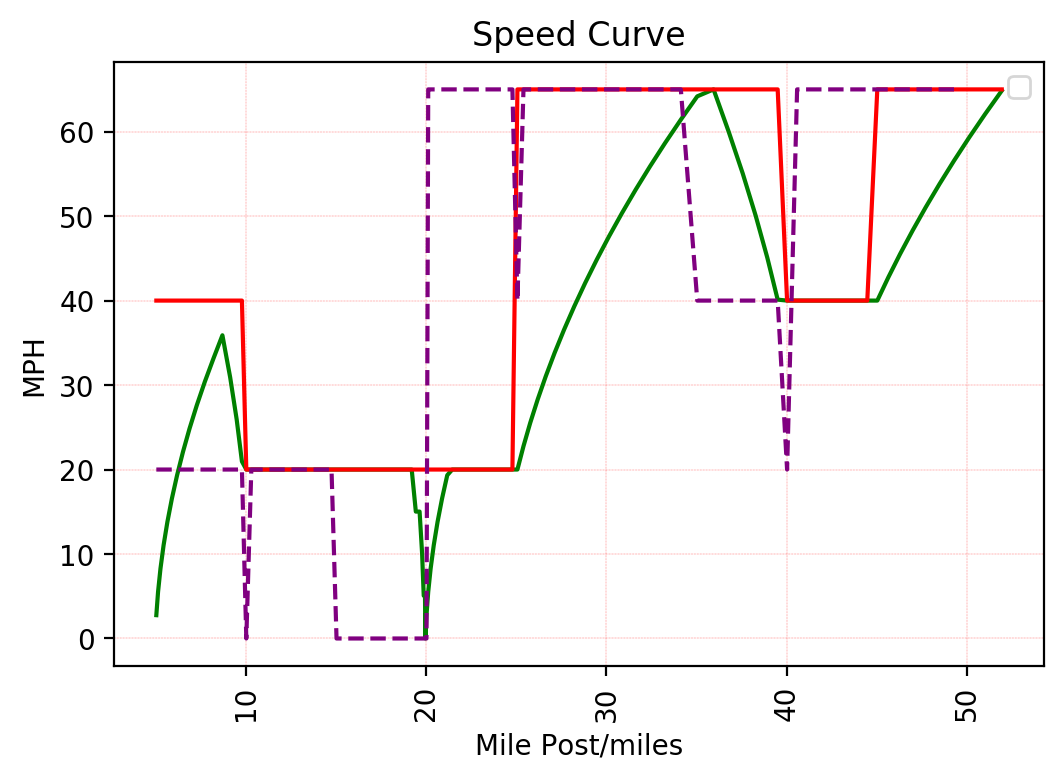

<Figure size 1440x1280 with 0 Axes>

In [15]:
speed_curve(sys, K165)

In [47]:
dp.get_route(sys.signal_points[8], 0, sys.signal_points[9],1,mainline=False)

StopIteration: 

In [6]:
[t.curr_track for t in sys.trains]

[Track <MP: 15.0~20.0 > <CtrlPnt 3 port: 1~CtrlPnt 4 port: 0> key: 0,
 Track <MP: 15.0~20.0 > <CtrlPnt 3 port: 3~CtrlPnt 4 port: 2> key: 1,
 Track <MP: 25.0~30.0 > <CtrlPnt 5 port: 1~CtrlPnt 6 port: 0> key: 0,
 Track <MP: 25.0~30.0 > <CtrlPnt 5 port: 3~AutoPnt11 port: 0> key: 0]

In [13]:
path = list(all_simple_paths(sys.G_origin, sys.signal_points[8], sys.signal_points[8]))[0]
for (i,j) in zip(path[0:],path[1:]):
    print(i,j)

In [6]:
dp.get_all_routes(sys.signal_points[8], 1, sys.signal_points[11], 0)

[[((CtrlPnt10, 0), (CtrlPnt 8, 1)), ((CtrlPnt 8, 0), (CtrlPnt 7, 1))]]

In [10]:
shortest_path(sys.G_origin, sys.signal_points[8], sys.signal_points[8])

[CtrlPnt 8]

In [19]:
dp.get_route(sys.signal_points[8], 1, sys.signal_points[11], 0)

[((CtrlPnt10, 0), (CtrlPnt 8, 1)), ((CtrlPnt 8, 0), (CtrlPnt 7, 1))]

In [15]:
for i in sys.bigblocks:
    if True:
        sys.bigblocks.remove(i)

In [16]:
sys.bigblocks

[]